# A. Project Description (Abalone Age Prediction)

__Here, we will go through the current scenario of the company associated with this project__

__AB Fresh Supply Co. Ltd.: Company Introduction__

__Your client for this project is an Abalone Producing and Processing company.__

They want to supply the highest quality of abalones with a good price through direct transactions with fish farms.
They have experience in exporting abalones to North America as well as South East Asia.
To find the highest quality abalones, they need to analyze their measurements.
One of the key measurements in this process is the age of the abalone.

__Current Scenario__
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.
By adding 1.5 to the number of rings, we get the abalone’s age in years.


# B. Problem Statement

__In this step, the problem statement of the project and the project deliverables are defined.__
Please refer the video in order to get a good understanding of what to expect in this step. After that, you can go through the text below to get the specific details related to this project.

__The current process suffers from the following problems:__
Since the age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.
This becomes a quite boring and time-consuming task.

__The company has hired you as data science consultants.
They want to automate the process of predicting the age of abalone from other physical measurements rather than doing this manual work.__

__Your Role__

You are given a dataset containing the physical measurements of abalones.
Your task is to build a regression model using the dataset.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

__Project Deliverables__
- Deliverable: Predict the number of rings for each abalone.
- Machine Learning Task: Regression
- Target Variable: Rings
- Win Condition: N/A (best possible model)

__Evaluation Metric__
- The model evaluation will be based on the RMSE score.
- To learn about RMSE’s Python implementation, please visit this link.


# C. Data Description

"This step provides an in-depth description of the dataset associated with this project.

The dataset contains all the necessary information about the abalones like their sex, length, diameter, height, weight, etc.
The column Rings is also present in the dataset which is a measure of the age of the abalone. By adding 1.5 to the number of rings, we get the abalone’s age in years.

This is the data that we have to predict for future samples.
The dataset is divided into two parts: Train, and Test sets.

__Train Set:__
- The train set contains 3341 rows and 10 columns.
- The last column Rings is the target variable.

__Test Set:__
- The test set contains 836 rows and 9 columns.
- The test set doesn’t contain the Rings column.
- It needs to be predicted for the test set.

__Sample Submission File:__
A sample submission csv file named sample_submission.csv is also provided with the dataset.
This sample submission file contains the format of the final predictions submission csv file that you need to upload via the Upload Submission tab.


|Id|Feature|Description|
|:--|:--|:--|
|01| ID| Unique Id of the sample|
|02| Sex	| The sex of the abalone (M, F, and I (infant)).
|03| Length	| Longest shell measurement (mm).
|04| Diameter|	    Diameter of abalone perpendicular to length (mm).
|05| Height	  |      Height of abalone with meat in the shell (mm).
|06| Whole_weight|	Weight of the whole abalone (grams).
|07| Shucked_weight|	Weight of the meat of abalone (grams).
|08| Viscera_weight|	Gut weight (after bleeding) of the abalone (grams).
|09| Shell_weight|	Weight of the abalone after being dried (grams).
|10| Rings|	        Number of Rings in the abalone.


# 1. Load Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

# 2. Import Data Sets

#### Insert Test DataSet

In [2]:
# data_test=pd.read_csv("abalone_test.csv")
# data_test.head(10)

In [3]:
# data_test.info()

In [4]:
# data_test.describe()

In [5]:
# data_test.shape

In [6]:
# data_test.isnull().sum()

In [7]:
# data_test.nunique()

In [8]:
# data_test.drop(['Id'], axis =1, inplace=True)
# data_test

#### Insert Train DataSet

In [9]:
data=pd.read_csv("abalone_Train.csv")
data.head()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,3141,I,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
1,3521,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
2,883,M,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3,3627,M,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
4,2106,M,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14


In [10]:
data.shape

(3341, 10)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              3341 non-null   int64  
 1   Sex             3341 non-null   object 
 2   Length          3341 non-null   float64
 3   Diameter        3341 non-null   float64
 4   Height          3341 non-null   float64
 5   Whole_weight    3341 non-null   float64
 6   Shucked_weight  3341 non-null   float64
 7   Viscera_weight  3341 non-null   float64
 8   Shell_weight    3341 non-null   float64
 9   Rings           3341 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 261.1+ KB


In [12]:
data.isnull().sum()

Id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [13]:
data.nunique()

Id                3341
Sex                  3
Length             134
Diameter           110
Height              51
Whole_weight      2148
Shucked_weight    1421
Viscera_weight     857
Shell_weight       864
Rings               27
dtype: int64

In [14]:
data.duplicated().value_counts()

False    3341
dtype: int64

In [15]:
data.describe()

,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,2085.442083,0.525887,0.409463,0.140129,0.838176,0.363600,0.182507,0.241385,9.958396
std,1197.721846,0.119759,0.098895,0.042623,0.493789,0.224156,0.110439,0.139828,3.205591
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1055.000000,0.450000,0.350000,0.115000,0.444500,0.188000,0.093500,0.132000,8.000000
50%,2086.000000,0.545000,0.425000,0.145000,0.810000,0.341500,0.172500,0.235000,10.000000
75%,3114.000000,0.620000,0.485000,0.165000,1.168500,0.509500,0.255500,0.330000,11.000000
max,4175.000000,0.815000,0.650000,1.130000,2.779500,1.488000,0.760000,1.005000,27.000000


### Observations:
        - No missing values in the dataset
        - All numerical features but 'sex'
        - Though features are not normaly distributed, are close to normality
        - None of the features have minimum = 0 except Height (requires re-check)
        - Max Whole_weight seems out of normal range (requires re-check)
        - Each feature has difference scale range

## 3. Pandas Data Pre-profiling

In [16]:
# from pandas_profiling import ProfileReport 
# profile = data.profile_report(title="Data Visualization Report : Abalone Age Prediction ", progress_bar=False, minimal=False)
# profile.to_file(output_file="Abalone_Age_Prediction_Pre-Profile.html")
# profile

## 4. Data Pre-Processing

#### Seems Id is uniqe to all rows, it is just an identification number so we can drop Id as it wont give any value addition in the prediction

In [17]:
data.drop(['Id'], axis=1, inplace=True)

In [18]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,I,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
1,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
2,M,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3,M,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
4,M,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14


### Check Outliers

In [19]:
# data = pd.get_dummies(data)
# dummy_data = data.copy()

<AxesSubplot:>

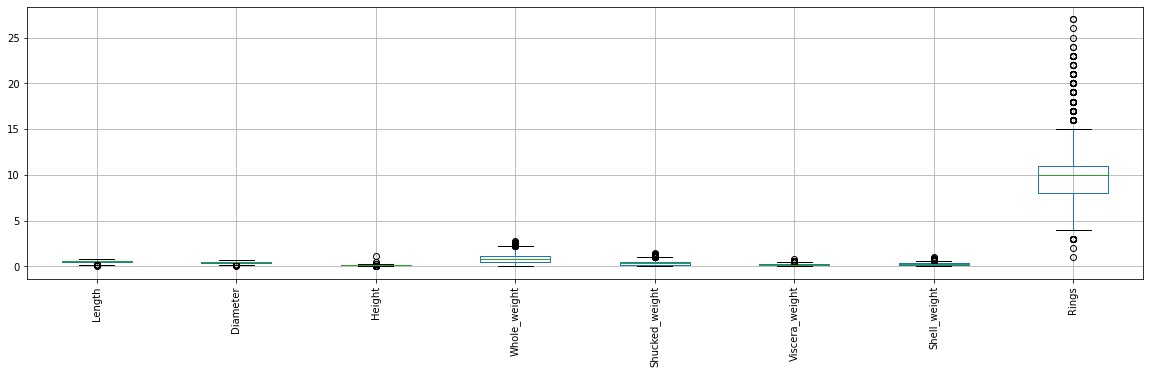

In [20]:
data.boxplot( rot = 90, figsize=(20,5))

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole_weight'}>],
       [<AxesSubplot:title={'center':'Shucked_weight'}>,
        <AxesSubplot:title={'center':'Viscera_weight'}>,
        <AxesSubplot:title={'center':'Shell_weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

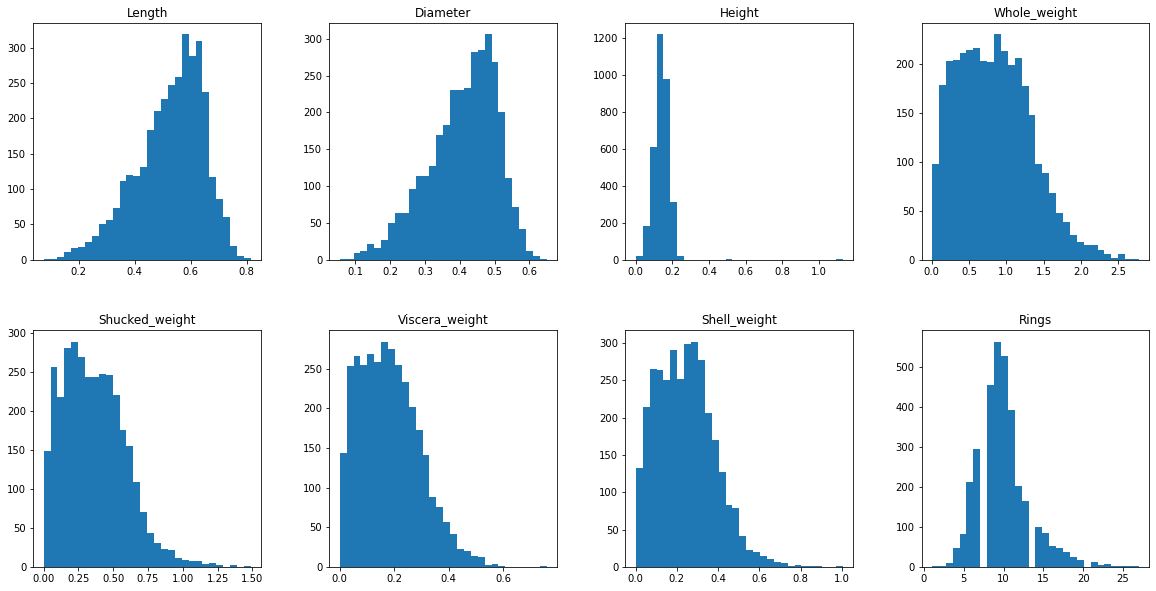

In [21]:
data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

### i. Height Correction

<AxesSubplot:>

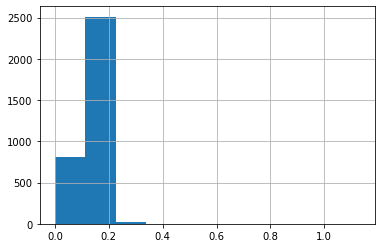

In [22]:
data['Height'].hist()

In [23]:
data['Height'].value_counts().sort_values(ascending = True).head(10)
# data['Height'].value_counts().sort_values(ascending = True).tail(10)

1.130    1
0.020    1
0.010    1
0.515    1
0.000    2
0.015    2
0.240    3
0.250    3
0.030    4
0.025    4
Name: Height, dtype: int64

In [24]:
data.Height.mean()

0.14012870398084376

In [25]:
data[data.Height>.5]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
1434,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10
2661,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8


In [26]:
data.Height[data.Height>.5] = data.Height.mean()

In [27]:
data[data.Height>.5]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings


In [28]:
# data.Height[1434]

In [29]:
data[data.Height == 0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
1311,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
2442,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [30]:
data.Height[data.Height==0] = data.Height.mean()

In [31]:
data[data.Height == 0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings


<AxesSubplot:>

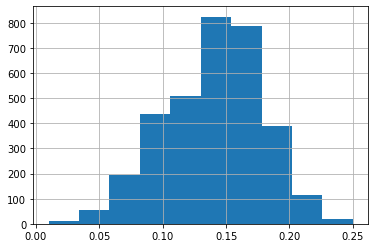

In [32]:
data['Height'].hist()

### ii. Whole_weight Correction

In [33]:
# data['Whole_weight'].hist()

In [34]:
# data['Whole_weight'].value_counts().sort_values(ascending = False).tail(10)
# data['Height'].value_counts().sort_values(ascending = True).tail(10)

In [35]:
# data.Whole_weight.sort_values().tail(10)

In [36]:
# data[data.Whole_weight > 2.5]

In [37]:
# data.Whole_weight.mean()

In [38]:
# data.Whole_weight[data.Whole_weight>2.5] = data.Whole_weight.mean()

In [39]:
# data[data.Whole_weight > 2.5].count()

In [40]:
# data.reset_index(drop=True, inplace=True)

In [41]:
# data['Whole_weight'].hist()

## 5. Data Post-Profiling


##### Post Profilining is not required as not much corrections were required

## 6. Exploratory Data Analysis

### A.	Univariate Analysis

#### i.	Number of Abalones as per Sex

M    1232
F    1058
I    1051
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

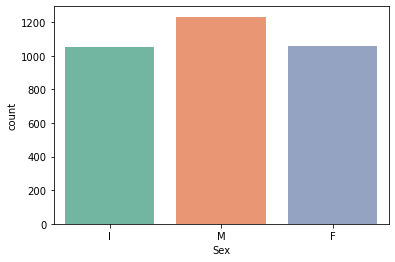

In [42]:
print(data.Sex.value_counts())
sns.countplot(x = 'Sex', data = data, palette="Set2")

In [43]:
# plt.figure(figsize=(8,5))
# plt.title("Counts of Abalone's based on Sex", fontsize=15)
# plt.xlabel('Sex', fontsize=15)
# plt.ylabel('Count', fontsize=14)
# data.Sex.value_counts().plot(kind='bar')

#### ii.	Number of Abalones as per common Ring sizes : Top 10 Counts

In [44]:
data.Rings.value_counts()[:10]

9     562
10    527
8     455
11    392
7     293
6     212
12    201
13    164
14    100
15     85
Name: Rings, dtype: int64

<AxesSubplot:>

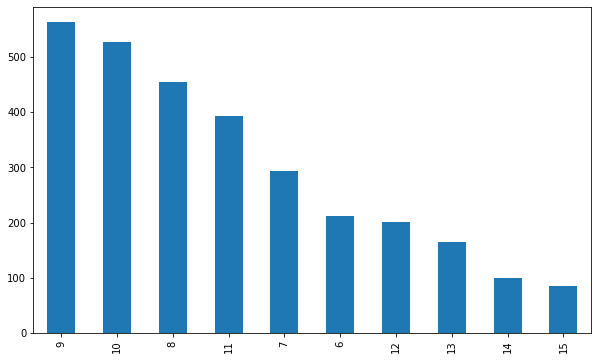

In [45]:
plt.figure(figsize=(10,6))
data.Rings.value_counts()[:10].plot(kind='bar')

### B.	Bi-variate Analysis

#### i. Is there a relationship between  Length VS Rings? Is the relationship linear?

Text(0, 0.5, 'Rings')

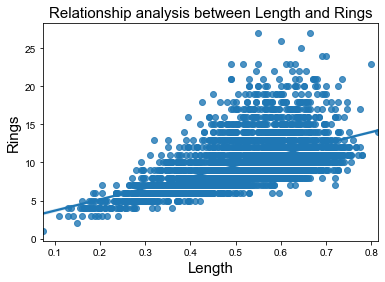

In [46]:
plt.title('Relationship analysis between Length and Rings', fontsize=15)
plt.xlabel('Length', fontsize=15)
plt.ylabel('Number of Rings', fontsize=15)

sns.regplot(data=data,x='Length',y='Rings')
sns.set(rc={'figure.figsize':(10,7)})
plt.xlabel('Length', fontsize=15)
plt.ylabel('Rings', fontsize=15)
# plt.savefig('015. Rel_ana_between_Price_&_Engine_Capacity.jpg', bbox_inches='tight')

#### ii. Is there a relationship between Diamateter VS Rings? Is the relationship linear?

Text(0, 0.5, 'Rings')

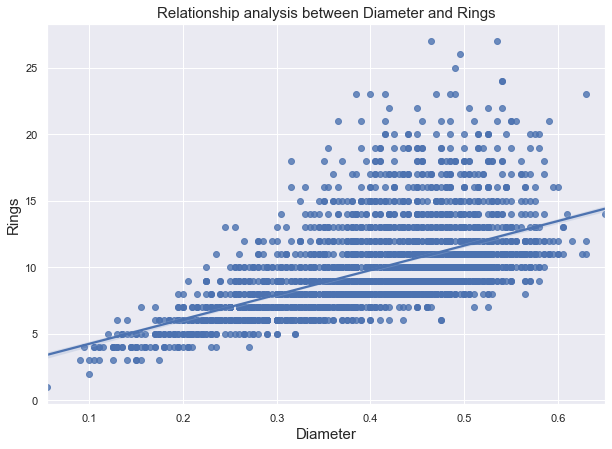

In [47]:
plt.title('Relationship analysis between Diameter and Rings', fontsize=15)
plt.xlabel('Diameter', fontsize=15)
plt.ylabel('Number of Rings', fontsize=15)

sns.regplot(data=data,x='Diameter',y='Rings')
sns.set(rc={'figure.figsize':(10,7)})
plt.xlabel('Diameter', fontsize=15)
plt.ylabel('Rings', fontsize=15)
# plt.savefig('015. Rel_ana_between_Price_&_Engine_Capacity.jpg', bbox_inches='tight')

#### iii. Is there a relationship between  Height VS Rings? Is the relationship linear?

Text(0, 0.5, 'Rings')

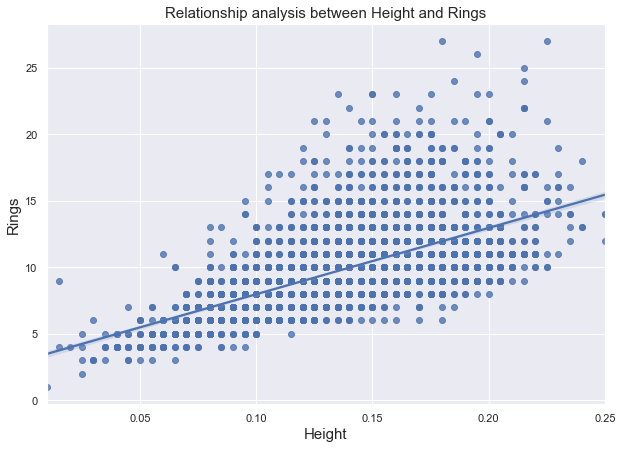

In [48]:
plt.title('Relationship analysis between Height and Rings', fontsize=15)
plt.xlabel('Height', fontsize=15)
plt.ylabel('Number of Rings', fontsize=15)

sns.regplot(data=data,x='Height',y='Rings')
sns.set(rc={'figure.figsize':(10,7)})
plt.xlabel('Height', fontsize=15)
plt.ylabel('Rings', fontsize=15)

### C. Multivariate Analysis

#### i.	Heatmap for Features Co-relation

In [49]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [50]:
features=['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

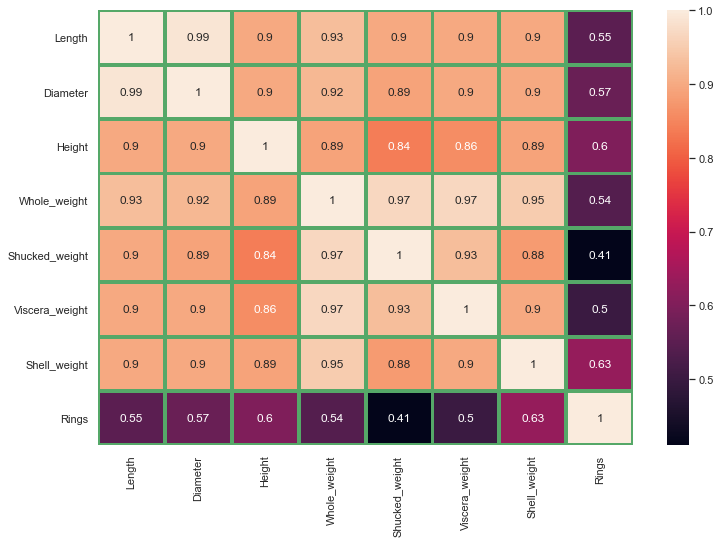

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(round(data[features].corr(),2),annot=True, linewidths=3,
                linecolor='g')
plt.show()

#### ii. Pairplot

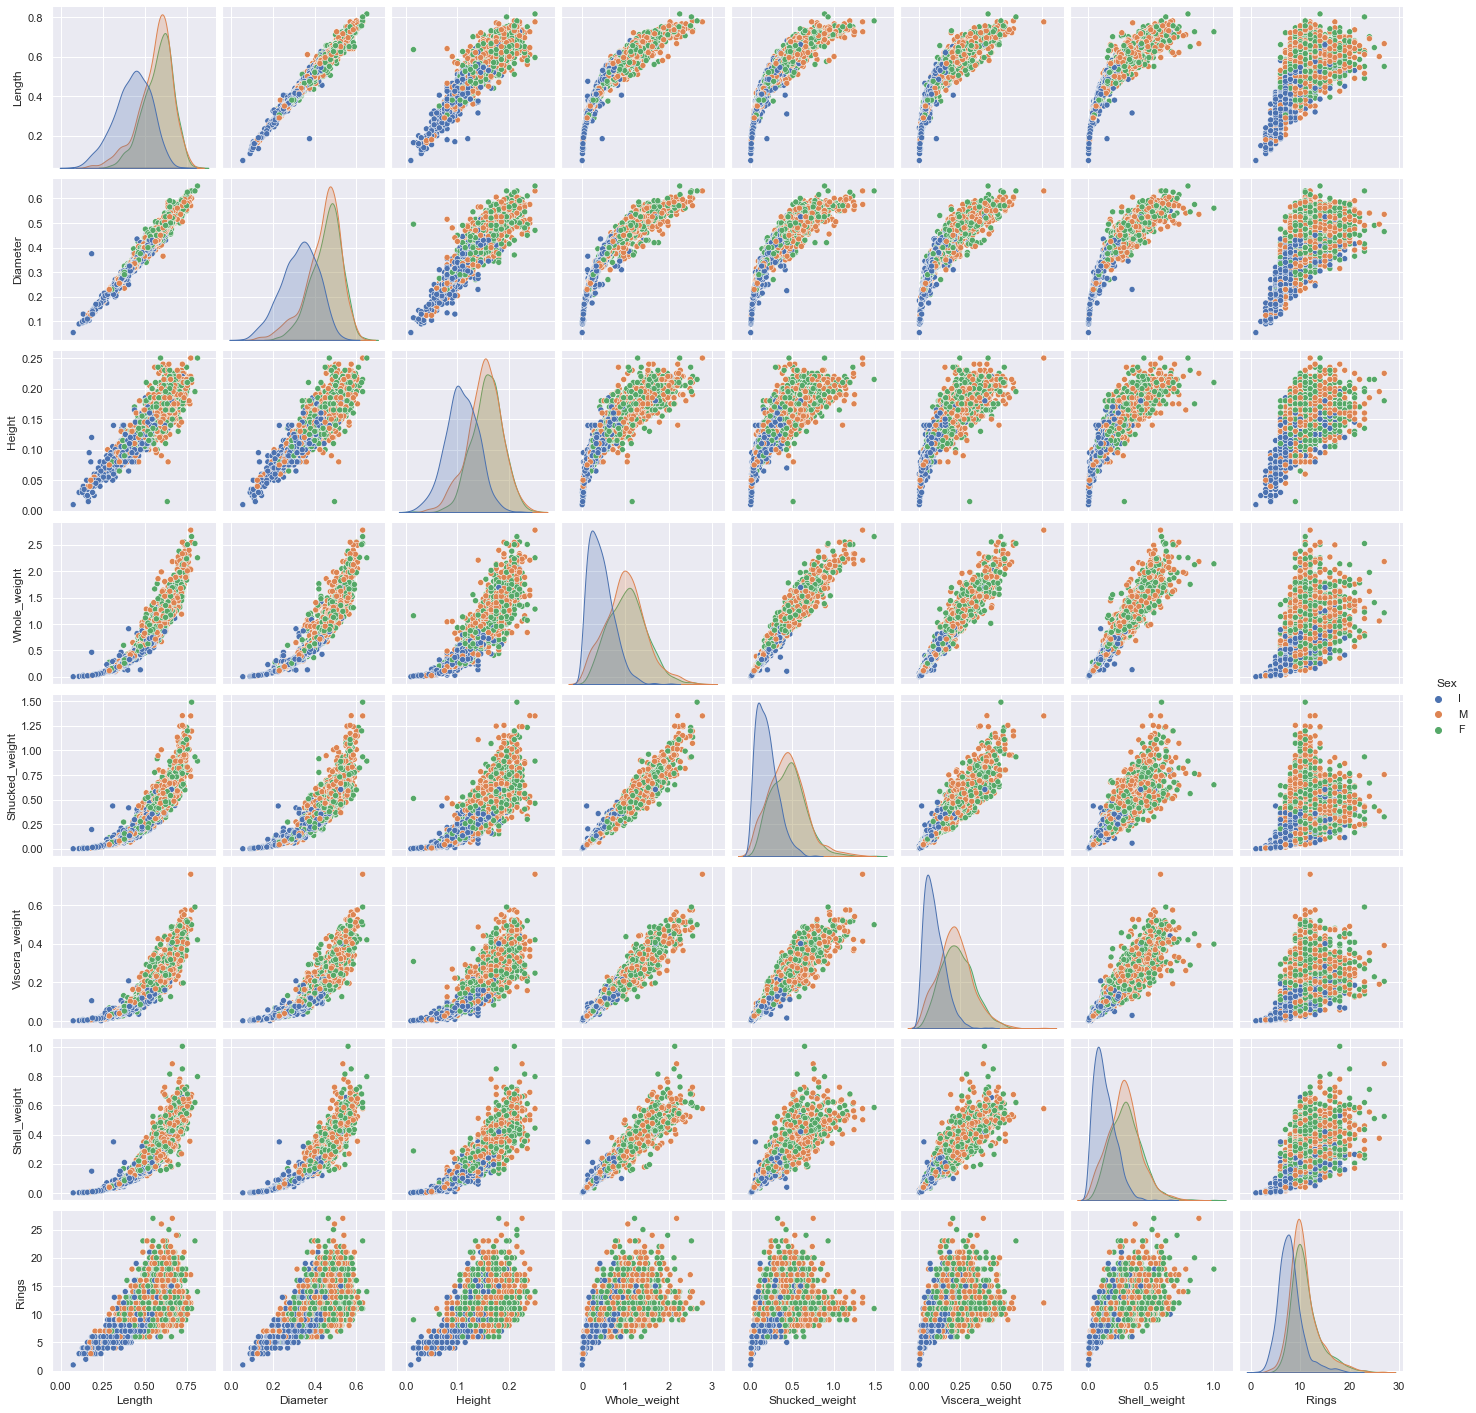

In [52]:
sns.pairplot(data[features], hue="Sex")

## 7. Splite the data into training and test set

#### Note: as the dataset is already divided to training and test sets no need to further split

## 8. Data Preparation

### A. Prepare the Train Data
#### # X_train, y_train

In [53]:
# data["Avg_Weigh"] = (data["Whole_weight"]+data["Shucked_weight"]+data["Viscera_weight"]+data["Shell_weight"])/4

In [54]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,I,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
1,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
2,M,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3,M,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
4,M,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14


In [55]:
# drop_cols=['Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
# data.drop(drop_cols, axis = 1, inplace=True)
# data

In [56]:
cat_cols = ['Sex']

In [57]:
data_with_dummies = pd.get_dummies(data, columns=cat_cols, drop_first=True)
data_with_dummies.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_I,Sex_M
0,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5,1,0
1,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3,1,0
2,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15,0,1
3,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10,0,1
4,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14,0,1


In [58]:
data=data_with_dummies
data.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_I,Sex_M
0,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5,1,0
1,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3,1,0
2,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15,0,1
3,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10,0,1
4,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14,0,1


In [59]:
data.columns

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings', 'Sex_I', 'Sex_M'],
      dtype='object')

In [60]:
features = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Sex_I', 'Sex_M']
target = ['Rings']

In [61]:
X_train=data[features]
X_train.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,1,0
1,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,1,0
2,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,0,1
3,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,0,1
4,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,0,1


In [62]:
y_train= data_with_dummies[target]
y_train.head()

,Rings
0,5
1,3
2,15
3,10
4,14


### B. Prepare the Test DataSet

#### # X_Test

In [63]:
data_test=pd.read_csv("abalone_test.csv")

In [64]:
data_test.head()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,668,M,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350
1,1580,I,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935
2,3784,M,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175
3,463,I,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200
4,2615,M,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775


In [65]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              836 non-null    int64  
 1   Sex             836 non-null    object 
 2   Length          836 non-null    float64
 3   Diameter        836 non-null    float64
 4   Height          836 non-null    float64
 5   Whole_weight    836 non-null    float64
 6   Shucked_weight  836 non-null    float64
 7   Viscera_weight  836 non-null    float64
 8   Shell_weight    836 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 58.9+ KB


In [66]:
data_test.describe()

,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,2098.222488,0.516417,0.401561,0.137069,0.791042,0.342452,0.172949,0.228623
std,1238.919375,0.121196,0.100419,0.038410,0.474981,0.212260,0.105973,0.136280
min,1.000000,0.140000,0.105000,0.020000,0.014500,0.005000,0.003000,0.005000
25%,994.750000,0.445000,0.345000,0.110000,0.432625,0.177875,0.091500,0.121000
50%,2108.500000,0.535000,0.420000,0.140000,0.770750,0.320250,0.161250,0.220000
75%,3202.000000,0.610000,0.475000,0.165000,1.097375,0.472000,0.242625,0.315000
max,4176.000000,0.770000,0.620000,0.240000,2.825500,1.146500,0.641500,0.897000


In [67]:
data_test.shape

(836, 9)

In [68]:
data_test.isnull().sum()

Id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
dtype: int64

In [69]:
data_test.nunique()

Id                836
Sex                 3
Length            112
Diameter           95
Height             45
Whole_weight      731
Shucked_weight    650
Viscera_weight    505
Shell_weight      395
dtype: int64

In [70]:
# data_test["Avg_Weigh"] = (data_test["Whole_weight"]+data_test["Shucked_weight"]+data_test["Viscera_weight"]+data_test["Shell_weight"])/4


In [71]:
data_test.drop(['Id'], axis=1, inplace=True)
data_test.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350
1,I,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935
2,M,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175
3,I,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200
4,M,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775


In [72]:
# data_test.drop(drop_cols, axis = 1, inplace=True)

In [73]:
# data_test.head()

In [74]:
cat_cols = ['Sex']

In [75]:
data_test_with_dummies=pd.get_dummies(data_test, columns=cat_cols, drop_first=True)

In [76]:
data_test_with_dummies.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350,0,1
1,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935,1,0
2,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175,0,1
3,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200,1,0
4,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775,0,1


In [77]:
data_test=data_test_with_dummies
data_test.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350,0,1
1,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935,1,0
2,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175,0,1
3,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200,1,0
4,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775,0,1


In [78]:
features = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Sex_I', 'Sex_M']
target = ['Rings']

In [79]:
X_test=data_test_with_dummies[features]

In [80]:
X_test.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350,0,1
1,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935,1,0
2,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175,0,1
3,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200,1,0
4,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775,0,1


In [81]:
X_train.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,1,0
1,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,1,0
2,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,0,1
3,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,0,1
4,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,0,1


### C. Sample data
#### #y_test

In [82]:
data_sample=pd.read_csv("sample_submission.csv")
data_sample.head()

,668,13
0,1580,9
1,3784,10
2,463,5
3,2615,10
4,1399,11


##### From the columns it seem those are ID and Ring numbers (target variable) of Test datasets

In [83]:
header_list = ["Id", "Rings"]
data_sample=pd.read_csv("sample_submission.csv", names=header_list)
data_sample.head()

,Id,Rings
0,668,13
1,1580,9
2,3784,10
3,463,5
4,2615,10


In [84]:
y_test=data_sample

In [85]:
y_test.head()

,Id,Rings
0,668,13
1,1580,9
2,3784,10
3,463,5
4,2615,10


In [86]:
y_test.drop('Id', axis=1, inplace=True)

In [87]:
y_test.head()

,Rings
0,13
1,9
2,10
3,5
4,10


In [88]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=0)

In [89]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (3341, 9)
y_train shape:  (3341, 1)

Test cases as below
X_test shape:  (836, 9)
y_test shape:  (836, 1)


In [90]:
X_train.head()
# X_test.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,1,0
1,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,1,0
2,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,0,1
3,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,0,1
4,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,0,1


## 9. Standardization of data

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
data1 = scaler.transform(X_train)
data2 = scaler.transform(X_test)  

### Formatting the Train Data Standard Set

In [92]:
data1

array([[-2.88863777, -2.77572159, -1.56035773, ..., -1.65503169,
         1.47610205, -0.76430564],
       [-2.59633945, -2.62402222, -2.21263909, ..., -1.6371499 ,
         1.47610205, -0.76430564],
       [ 1.12002486,  1.21902846,  0.78785515, ...,  1.51362157,
        -0.67745994,  1.30837711],
       ...,
       [ 0.57718513,  0.40996516,  0.1355738 , ...,  0.0866547 ,
        -0.67745994,  1.30837711],
       [ 0.82772654,  0.81449681,  0.65739888, ...,  0.55158125,
        -0.67745994, -0.76430564],
       [-0.96782026, -0.85419625, -0.7776201 , ..., -1.00413452,
         1.47610205, -0.76430564]])

In [93]:
data_st = pd.DataFrame(data1)

In [94]:
data_st.head()

,0,1,2,3,4,5,6,7,8
0,-2.888638,-2.775722,-1.560358,-1.630852,-1.557628,-1.589404,-1.655032,1.476102,-0.764306
1,-2.596339,-2.624022,-2.212639,-1.614648,-1.555397,-1.571292,-1.637150,1.476102,-0.764306
2,1.120025,1.219028,0.787855,1.118712,1.012390,0.267095,1.513622,-0.677460,1.308377
3,1.579351,1.168462,1.570593,2.130430,2.616421,2.295660,1.352685,-0.677460,1.308377
4,0.577185,0.460532,0.396486,0.410813,0.233800,0.253511,0.884183,-0.677460,1.308377


In [95]:
data_st.shape

(3341, 9)

In [96]:
X_train.columns

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Sex_I', 'Sex_M'],
      dtype='object')

In [97]:
data_st.columns=['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Sex_I', 'Sex_M']

In [98]:
data_st.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,-2.888638,-2.775722,-1.560358,-1.630852,-1.557628,-1.589404,-1.655032,1.476102,-0.764306
1,-2.596339,-2.624022,-2.212639,-1.614648,-1.555397,-1.571292,-1.637150,1.476102,-0.764306
2,1.120025,1.219028,0.787855,1.118712,1.012390,0.267095,1.513622,-0.677460,1.308377
3,1.579351,1.168462,1.570593,2.130430,2.616421,2.295660,1.352685,-0.677460,1.308377
4,0.577185,0.460532,0.396486,0.410813,0.233800,0.253511,0.884183,-0.677460,1.308377


In [99]:
X_train_st=data_st

In [100]:
X_train_st.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,-2.888638,-2.775722,-1.560358,-1.630852,-1.557628,-1.589404,-1.655032,1.476102,-0.764306
1,-2.596339,-2.624022,-2.212639,-1.614648,-1.555397,-1.571292,-1.637150,1.476102,-0.764306
2,1.120025,1.219028,0.787855,1.118712,1.012390,0.267095,1.513622,-0.677460,1.308377
3,1.579351,1.168462,1.570593,2.130430,2.616421,2.295660,1.352685,-0.677460,1.308377
4,0.577185,0.460532,0.396486,0.410813,0.233800,0.253511,0.884183,-0.677460,1.308377


#### < New Lines

In [101]:
# X_train_st.drop(['Sex_I'], axis=1, inplace =True)

In [102]:
# X_train_st.drop(['Sex_M'], axis=1, inplace =True)

In [103]:
# X_train_st.head()

In [104]:
# X_train_st['Sex_I'] = X_train['Sex_I']
# X_train_st['Sex_M'] = X_train['Sex_M']

In [105]:
# X_train_st.head()

#### New Lines >

In [106]:
X_train.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,1,0
1,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,1,0
2,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,0,1
3,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,0,1
4,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,0,1


In [107]:
y_train.head()

,Rings
0,5
1,3
2,15
3,10
4,14


### Formatting the Standard Test Data set

In [108]:
data2

array([[ 0.20137301,  0.15713288,  0.39648634, ...,  0.66960106,
        -0.67745994,  1.30837711],
       [-0.21619602, -0.0956994 , -0.51670756, ..., -0.34250827,
         1.47610205, -0.76430564],
       [ 0.78596964,  0.7133639 ,  0.39648634, ...,  0.54442853,
        -0.67745994,  1.30837711],
       ...,
       [-0.67552194, -0.65193042, -0.90807637, ..., -0.88969106,
         1.47610205, -0.76430564],
       [ 0.1178592 ,  0.25826579,  1.0487677 , ...,  0.5980739 ,
        -0.67745994,  1.30837711],
       [-2.30404114, -2.37118994, -2.08218282, ..., -1.58350453,
         1.47610205, -0.76430564]])

In [109]:
data_test_st = pd.DataFrame(data2)

In [110]:
data_test_st.head()

,0,1,2,3,4,5,6,7,8
0,0.201373,0.157133,0.396486,0.160669,-0.384165,0.547834,0.669601,-0.677460,1.308377
1,-0.216196,-0.095699,-0.516708,-0.450008,-0.457785,-0.357775,-0.342508,1.476102,-0.764306
2,0.785970,0.713364,0.396486,0.845275,0.729064,1.734183,0.544429,-0.677460,1.308377
3,-2.554583,-2.472323,-2.212639,-1.587305,-1.526395,-1.544124,-1.583505,1.476102,-0.764306
4,0.994754,0.915630,0.918311,1.361767,1.382723,1.747767,0.973592,-0.677460,1.308377


In [111]:
data_test_st.shape

(836, 9)

In [112]:
X_test.columns

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Sex_I', 'Sex_M'],
      dtype='object')

In [113]:
data_test_st.columns=['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Sex_I', 'Sex_M']

In [114]:
data_test_st.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.201373,0.157133,0.396486,0.160669,-0.384165,0.547834,0.669601,-0.677460,1.308377
1,-0.216196,-0.095699,-0.516708,-0.450008,-0.457785,-0.357775,-0.342508,1.476102,-0.764306
2,0.785970,0.713364,0.396486,0.845275,0.729064,1.734183,0.544429,-0.677460,1.308377
3,-2.554583,-2.472323,-2.212639,-1.587305,-1.526395,-1.544124,-1.583505,1.476102,-0.764306
4,0.994754,0.915630,0.918311,1.361767,1.382723,1.747767,0.973592,-0.677460,1.308377


In [115]:
X_test_st=data_test_st

In [116]:
X_test_st.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.201373,0.157133,0.396486,0.160669,-0.384165,0.547834,0.669601,-0.677460,1.308377
1,-0.216196,-0.095699,-0.516708,-0.450008,-0.457785,-0.357775,-0.342508,1.476102,-0.764306
2,0.785970,0.713364,0.396486,0.845275,0.729064,1.734183,0.544429,-0.677460,1.308377
3,-2.554583,-2.472323,-2.212639,-1.587305,-1.526395,-1.544124,-1.583505,1.476102,-0.764306
4,0.994754,0.915630,0.918311,1.361767,1.382723,1.747767,0.973592,-0.677460,1.308377


In [117]:
X_test_st.drop(['Sex_I'], axis=1, inplace =True)

In [118]:
X_test_st.drop(['Sex_M'], axis=1, inplace =True)

In [119]:
X_test_st.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.201373,0.157133,0.396486,0.160669,-0.384165,0.547834,0.669601
1,-0.216196,-0.095699,-0.516708,-0.450008,-0.457785,-0.357775,-0.342508
2,0.785970,0.713364,0.396486,0.845275,0.729064,1.734183,0.544429
3,-2.554583,-2.472323,-2.212639,-1.587305,-1.526395,-1.544124,-1.583505
4,0.994754,0.915630,0.918311,1.361767,1.382723,1.747767,0.973592


In [120]:
X_test_st['Sex_I'] = X_test['Sex_I']
X_test_st['Sex_M'] = X_test['Sex_M']

In [121]:
X_test_st.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.201373,0.157133,0.396486,0.160669,-0.384165,0.547834,0.669601,0,1
1,-0.216196,-0.095699,-0.516708,-0.450008,-0.457785,-0.357775,-0.342508,1,0
2,0.785970,0.713364,0.396486,0.845275,0.729064,1.734183,0.544429,0,1
3,-2.554583,-2.472323,-2.212639,-1.587305,-1.526395,-1.544124,-1.583505,1,0
4,0.994754,0.915630,0.918311,1.361767,1.382723,1.747767,0.973592,0,1


In [122]:
X_test.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350,0,1
1,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935,1,0
2,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175,0,1
3,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200,1,0
4,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775,0,1


In [123]:
y_test.head()

,Rings
0,13
1,9
2,10
3,5
4,10


## 10. Model Fit: Fit Simple Linear Regression to the Training Dataset

In [124]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_st, y_train)

LinearRegression()

In [125]:
y_pred_train = lr_model.predict(X_train_st)

In [126]:
y_pred_train

array([[ 5.59959132],
       [ 5.29608294],
       [13.73148706],
       ...,
       [ 9.65316284],
       [11.75517948],
       [ 8.09884215]])

In [127]:
y_pred_test = lr_model.predict(X_test_st)

y_pred_test

In [128]:
X_train.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,1,0
1,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,1,0
2,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,0,1
3,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,0,1
4,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,0,1


In [129]:
data_with_dummies['Predictions']= y_pred_train.astype(int)

In [130]:
data_with_dummies.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_I,Sex_M,Predictions
0,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5,1,0,5
1,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3,1,0,5
2,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15,0,1,13
3,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10,0,1,9
4,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14,0,1,12


In [131]:
data_with_dummies['error'] = data_with_dummies['Rings'] - data_with_dummies['Predictions']

In [132]:
data_with_dummies.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_I,Sex_M,Predictions,error
0,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5,1,0,5,0
1,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3,1,0,5,-2
2,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15,0,1,13,2
3,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10,0,1,9,1
4,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14,0,1,12,2


In [133]:
# sns.regplot(y_test,y_pred_test)
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')

Text(0, 0.5, 'Predicted Values')

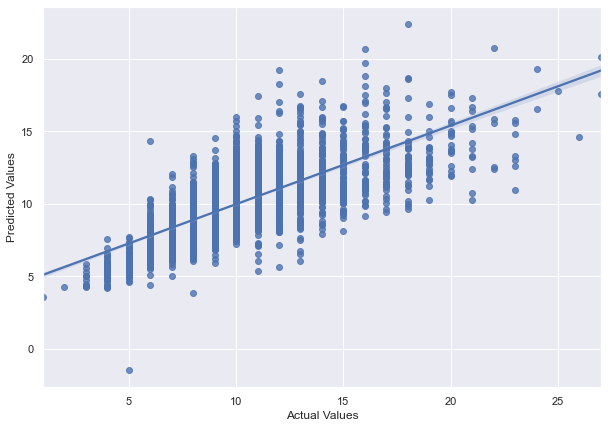

In [134]:
sns.regplot(y_train,y_pred_train)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

###  Visualize the Train set result

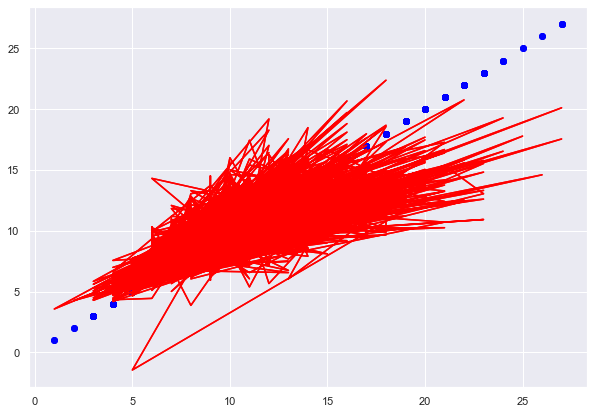

In [135]:
plt.scatter(data['Rings'], y_train, color='blue')
plt.plot(data['Rings'], y_pred_train, color='red' )

plt.scatter(data['Rings'], y_train, color='blue')
plt.plot(data['Rings'], y_pred_train, color='red' )

### Visualize the Test Set Result

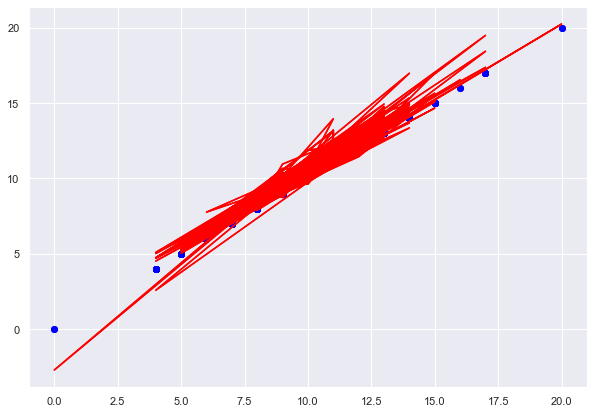

In [136]:
plt.scatter(y_test['Rings'], y_test, color='blue')
plt.plot(y_test['Rings'], y_pred_test, color='red' )

plt.scatter(y_test['Rings'], y_test, color='blue')
plt.plot(y_test['Rings'], y_pred_test, color='red' )

## 11. Model Evaluation using __metrics.__

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Sales predictions

__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Rings predictions

In [137]:
from sklearn import metrics
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
RMSE_train = np.sqrt(MSE_train)
r2_train = metrics.r2_score(y_train, y_pred_train)

In [138]:
print ("MAE_Train   ", MAE_train.round(4))
print ("MSE_Train   ", MSE_train.round(4))
print ("RMSE_Train  ", RMSE_train.round(4))
print ("R2 Squared  ", r2_train.round(4))

MAE_Train    1.5731
MSE_Train    4.7126
RMSE_Train   2.1708
R2 Squared   0.5413


In [139]:
y_test.shape

(836, 1)

In [140]:
y_pred_test.shape

(836, 1)

In [141]:
y_test['Predictions']= y_pred_test

In [142]:
y_test.head()

,Rings,Predictions
0,13,12.871861
1,9,9.201469
2,10,9.945625
3,5,5.658735
4,10,10.385146


In [143]:
header_list = ["Id", "Rings"]
data_sample=pd.read_csv("sample_submission.csv", names=header_list)
data_sample.head(10)

,Id,Rings
0,668,13
1,1580,9
2,3784,10
3,463,5
4,2615,10
5,1399,11
6,2054,7
7,2058,9
8,217,8
9,1931,11


In [144]:
data_sample["Predictions"] = y_test["Predictions"].astype(int)

In [145]:
data_sample

,Id,Rings,Predictions
0,668,13,12
1,1580,9,9
2,3784,10,9
3,463,5,5
4,2615,10,10
...,...,...,...
831,575,10,10
832,3231,9,8
833,1084,8,8
834,290,12,12


In [146]:
data_sample.drop(['Rings'], axis=1, inplace=True)

In [147]:
data_sample.head()

,Id,Predictions
0,668,12
1,1580,9
2,3784,9
3,463,5
4,2615,10


In [148]:
data_sample.to_csv('sample_submission.csv', header=False, index=False)

In [149]:
data_sample2=pd.read_csv("sample_submission.csv")
data_sample2

,668,12
0,1580,9
1,3784,9
2,463,5
3,2615,10
4,1399,11
...,...,...
830,575,10
831,3231,8
832,1084,8
833,290,12


## Feature Selection 2

#### Lets try removing the weights and see if thre is any improvement in the model

In [150]:
features = ['Length', 'Diameter', 'Height', 'Sex_I', 'Sex_M']
target = ['Rings']

In [151]:
X_train2=data_with_dummies[features]
X_train2.head()

,Length,Diameter,Height,Sex_I,Sex_M
0,0.180,0.135,0.080,1,0
1,0.215,0.150,0.055,1,0
2,0.660,0.530,0.170,0,1
3,0.715,0.525,0.200,0,1
4,0.595,0.455,0.155,0,1


In [152]:
y_train2 = data_with_dummies[target]
y_train2.head()

,Rings
0,5
1,3
2,15
3,10
4,14


In [153]:
X_test

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350,0,1
1,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935,1,0
2,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175,0,1
3,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200,1,0
4,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775,0,1
...,...,...,...,...,...,...,...,...,...
831,0.610,0.475,0.140,1.1330,0.5275,0.2355,0.3500,0,0
832,0.410,0.325,0.120,0.3745,0.1580,0.0810,0.1250,0,1
833,0.445,0.345,0.105,0.4090,0.1675,0.1015,0.1170,1,0
834,0.540,0.435,0.180,0.9960,0.3835,0.2260,0.3250,0,1


In [154]:
X_test2=X_test[features]
X_test2.head()

,Length,Diameter,Height,Sex_I,Sex_M
0,0.550,0.425,0.155,0,1
1,0.500,0.400,0.120,1,0
2,0.620,0.480,0.155,0,1
3,0.220,0.165,0.055,1,0
4,0.645,0.500,0.175,0,1


## Standardization of data

In [155]:
from sklearn.preprocessing import StandardScaler
scaler_train2 = StandardScaler().fit(X_train2)
X_train2 = scaler_train2.transform(X_train2) 

In [156]:
scaler_test2 = StandardScaler().fit(X_test2)
X_test2 = scaler_test2.transform(X_test2) 

In [157]:
lr_model2 = LinearRegression(fit_intercept=True)

In [158]:
lr_model2.fit(X_train2, y_train2)

LinearRegression()

In [159]:
y_pred_train2 = lr_model2.predict(X_train2)

In [160]:
y_pred_train2

array([[ 6.44305775],
       [ 5.40414846],
       [11.83113741],
       ...,
       [10.285047  ],
       [11.44076057],
       [ 8.15175372]])

In [161]:
y_pred_test2 = lr_model2.predict(X_test2)

In [162]:
y_pred_test2

array([[10.87801339],
       [ 8.94196216],
       [11.01869405],
       [ 5.81488141],
       [11.7815921 ],
       [11.54535981],
       [ 9.15015616],
       [10.32939884],
       [ 8.29621789],
       [11.02149763],
       [ 8.70314373],
       [ 6.59859099],
       [ 9.36146277],
       [ 9.82429111],
       [ 5.8706106 ],
       [11.05435821],
       [ 8.12951191],
       [12.91640813],
       [12.19964717],
       [ 8.02804484],
       [ 7.50497327],
       [ 6.55990581],
       [ 8.44438947],
       [ 8.45131296],
       [ 9.3716274 ],
       [11.20279134],
       [ 5.49995973],
       [12.07338026],
       [ 9.87577119],
       [10.08676877],
       [ 8.74791766],
       [ 4.49679771],
       [11.70019072],
       [13.71322089],
       [ 8.05827516],
       [10.67314868],
       [ 8.96658532],
       [12.50562654],
       [ 8.65118205],
       [11.72660941],
       [12.0251861 ],
       [10.00068006],
       [11.24051258],
       [11.32270458],
       [12.23640447],
       [ 9

In [163]:
data_with_dummies['Predictions']= y_pred_train.astype(int)

In [164]:
data_with_dummies.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_I,Sex_M,Predictions,error
0,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5,1,0,5,0
1,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3,1,0,5,-2
2,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15,0,1,13,2
3,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10,0,1,9,1
4,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14,0,1,12,2


In [165]:
data_with_dummies['error'] = data_with_dummies['Rings'] - data_with_dummies['Predictions']

In [166]:
data_with_dummies

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_I,Sex_M,Predictions,error
0,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5,1,0,5,0
1,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3,1,0,5,-2
2,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15,0,1,13,2
3,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10,0,1,9,1
4,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14,0,1,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3336,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770,10,0,1,13,-3
3337,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850,12,0,0,9,3
3338,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535,10,0,1,9,1
3339,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185,9,0,0,11,-2


In [167]:
MAE_train2 = metrics.mean_absolute_error(y_train2, y_pred_train2)
MSE_train2 = metrics.mean_squared_error(y_train2, y_pred_train2)
RMSE_train2 = np.sqrt(MSE_train2)

In [168]:
print('MAE for training set 2 is {}'.format(MAE_train2.round(3)))
print('RMSE for training set 2 is {}'.format(RMSE_train2.round(3)))

MAE for training set 2 is 1.819
RMSE for training set 2 is 2.526


In [169]:
print('MAE for training set 1 was {}'.format(MAE_train.round(3)))
print('RMSE for training set 1 was {}'.format(RMSE_train.round(3)))

MAE for training set 1 was 1.573
RMSE for training set 1 was 2.171


#### As there is no improvement in the model we really need to keep the weights

#### Final result : 
    - RMSE for training set =  2.171